## Matthew Grace

# What correlations are there between sentiment of Amazon reviews and the rating of a product from that reviewer? Do review lengths affect how much praise or hate a reviewer will give a product?

To investigate these questions, I will use my dataset of reviews for Amazon products. These products are sports products mainly related to rugby and soccer. A sentiment analysis can be conducted on the reviews, and an analysis comparing rating with sentiment can be done.

First, necessary import statements and inital setup of our data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('amazon_reviews.csv')
data.head()

,Product Name,Rating,Date,Author,Body,Link
0,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"September 11, 2019",XtinaG,There is great stretch and comfort to these sh...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...
1,RHINO RUGBY Fitted Stretch Performance Game Da...,1.0,"January 3, 2020",Amazon Customer,Im a medium 31 or 32 waist on every thing i bu...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...
2,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"August 4, 2019",XtinaG,This was my first pair of rugby shorts. I tend...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...
3,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"April 14, 2019",Amazon Customer,I did not want shorts that are tight on the wa...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...
4,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"March 13, 2019",Garrett,"Well made, heavy fabric. The flexible materia...",https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...


Now, changes to the Frame can begin along with further analysis. A bag of words column will be added to the data DataFrame to start. along with the length of each review's bag of words. Also, a bag of all the reviews will be made. This "bag" is a list of all of the words from a customer's review.

In [3]:
data['bag'] = data.Body.map(lambda b: b.strip(',.;?!:').replace(',',' ')
                            .replace('.',' ').replace('?',' ')
                            .replace('!',' ').replace(':',' ')
                            .replace(';',' ').lower().split())
print(data.bag[10])



["i've", 'had', 'bad', 'experience', 'buying', 'shorts', 'always', '3', 'sizes', 'to', 'big']


In [4]:
data['lens'] = data.bag.map(len)
print(data.lens.head())
bag_all = (' '.join(data.Body).lower().strip(',.;?!:').replace(',',' ')
                            .replace('.',' ').replace('?',' ')
                            .replace('!',' ').replace(':',' ')
                            .replace(';',' ').split())
                
    
bag_all[:10]

0    25
1    37
2    41
3    50
4    52
Name: lens, dtype: int64


['there',
 'is',
 'great',
 'stretch',
 'and',
 'comfort',
 'to',
 'these',
 'shorts',
 'while']

With a proper and useful dataframe ready to use, sentiment analysis can be conducted.

In [5]:
# create sets of positive and negative words from files
pos = set(open('positive.txt').read().split())
neg = set(open('negative.txt').read().split())


At this point in my analysis I decided to coninute to add columns that I deedmed useful as I progress. Some columns related to senitment will be created.

In [6]:
data['numpos'] = data.bag.map(lambda p: len([w for w in p if w in pos])) # number of 
# positive words
data['numneg'] = data.bag.map(lambda p: len([w for w in p if w in neg])) # number of 
# negaive words
data['perpos'] = data.numpos / data.lens #
data['perneg'] = data.numneg / data.lens
data['numposneg'] = data.numpos + data.numneg
data['perposneg'] = data.numposneg / data.lens

In [7]:
data.head()

,Product Name,Rating,Date,Author,Body,Link,bag,lens,numpos,numneg,perpos,perneg,numposneg,perposneg
0,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"September 11, 2019",XtinaG,There is great stretch and comfort to these sh...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[there, is, great, stretch, and, comfort, to, ...",25,3,0,0.120000,0.000000,3,0.120000
1,RHINO RUGBY Fitted Stretch Performance Game Da...,1.0,"January 3, 2020",Amazon Customer,Im a medium 31 or 32 waist on every thing i bu...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[im, a, medium, 31, or, 32, waist, on, every, ...",37,0,0,0.000000,0.000000,0,0.000000
2,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"August 4, 2019",XtinaG,This was my first pair of rugby shorts. I tend...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[this, was, my, first, pair, of, rugby, shorts...",41,5,1,0.121951,0.024390,6,0.146341
3,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"April 14, 2019",Amazon Customer,I did not want shorts that are tight on the wa...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[i, did, not, want, shorts, that, are, tight, ...",50,2,0,0.040000,0.000000,2,0.040000
4,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"March 13, 2019",Garrett,"Well made, heavy fabric. The flexible materia...",https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[well, made, heavy, fabric, the, flexible, mat...",52,6,1,0.115385,0.019231,7,0.134615


Now, the first analysis will be looking at summary stats and comparisons of sentiment with rankings. I am doing this to understand my dataset of reviews, and then I will attempt to make a metric for sentiment and decide how to proceed with further analysis.

In [8]:
print('Average Rating', data.Rating.mean())
print('Average Positive Words',data.numpos.mean())
print('Average Negative Words',data.numneg.mean())
print('Average Percent of Positive Words',data.perpos.mean())
print('Average Percent of Negative Words',data.perneg.mean())


Average Rating 4.152088258471237
Average Positive Words 1.7714736012608352
Average Negative Words 0.4507486209613869
Average Percent of Positive Words 0.18022185285154976
Average Percent of Negative Words 0.01860594074932793


Immediatley of note, there are way more positive words than negative words. This is almost certainly due to the fact that the average rating of our products is very high at about 4.15. Moving forward, instead of metricizing senitiment (which will be difficult with such small amount of negative sentiment) I will begin to use the columns for positive, negative, and overall intensity of senitment to look at correlations.

## Rating Correlations

In [9]:
#Rating Correlations
data.corr().iloc[0,:]

Rating       1.000000
lens        -0.094630
numpos       0.173226
numneg      -0.170782
perpos       0.287601
perneg      -0.220731
numposneg    0.070780
perposneg    0.244384
Name: Rating, dtype: float64

## Length Correlations

In [10]:
#Length Correlations
print(data.corr().iloc[1,:])

Rating      -0.094630
lens         1.000000
numpos       0.707259
numneg       0.711057
perpos      -0.283276
perneg       0.060560
numposneg    0.815215
perposneg   -0.274180
Name: lens, dtype: float64


## Visualizing the data

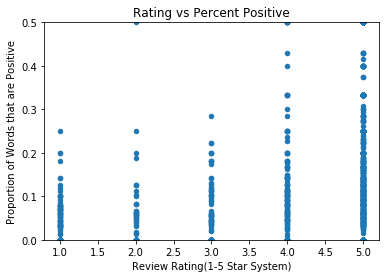

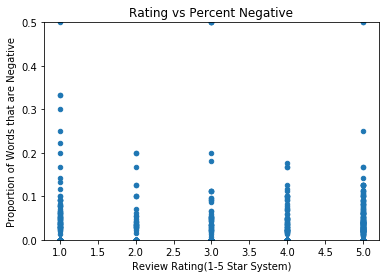

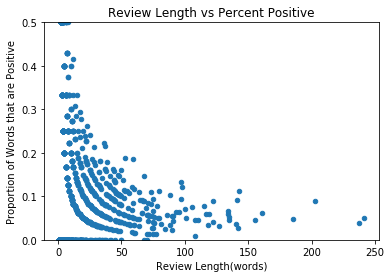

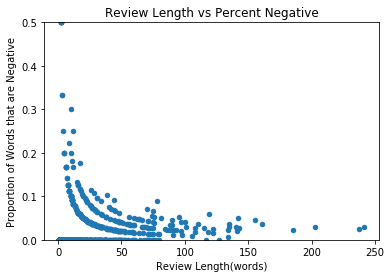

In [11]:
data.plot.scatter(x='Rating',y='perpos',ylim=(0,0.5),title='Rating vs Percent Positive')
plt.title('Rating vs Percent Positive');
plt.xlabel('Review Rating(1-5 Star System)');
plt.ylabel('Proportion of Words that are Positive');
data.plot.scatter(x='Rating',y='perneg',ylim=(0,0.5),title='Rating vs Percent Negative')
plt.title('Rating vs Percent Negative');
plt.xlabel('Review Rating(1-5 Star System)');
plt.ylabel('Proportion of Words that are Negative');
data.plot.scatter(x='lens',y='perpos',ylim=(0,0.5),title='Length vs Percent Positive')
plt.title('Review Length vs Percent Positive');
plt.xlabel('Review Length(words)');
plt.ylabel('Proportion of Words that are Positive');
data.plot.scatter(x='lens',y='perneg',ylim=(0,0.5),title='Length vs Percent Negative')
plt.title('Review Length vs Percent Negative');
plt.xlabel('Review Length(words)');
plt.ylabel('Proportion of Words that are Negative');


The brief analysis shows that there is a weak correlation between rating and 'how' positive or negative a review is (using the percentage of words in the review that are positive or negative). This is interesting, as well as the slightly stronger correlation between review length and what percentage of the review is positive words, in comparison to the very weak correlation. Additionally, the length vs percentage plots show the potential for a log fit.

## Summary of Initial Analysis
The intial analysis has shown that there are some correlations worthy of investigating further. There is a moderate correlation between positivity of reviews and their rating, as well as for negative. Also, there is a moderate and slightly stronger correlation between positivity of reviews and their length, in contrast to the very weak correlation between review negativity and length.

### Main Finding
The Amazon rating system, at a fundamental level, does a good job at representing the sentiment given in the reviews themselves. The ratings had a moderatley strong correlation with positivity at about r =0.24, while negative was about r=-0.28. These correlations match what a proper rating system would represent. As the ratings increase in value, the percentage of positive words will increase, and as the ratings decrease in value, the percentage of negative words in the reviews would increase. This matches what a rating system should fundamentally accomplish.

### Next Step
The main issue with this initial analysis has been that it is known there is a low sample size of negative reviews. For this reason, any further analysis regarding negativity in reviews will be much more difficult. 

Next, the main investigation will be into how review lengths affects the positivity of those positive reviews. 

Is there a reliable way to produce a way of predicting the positivity of a review, given that it is positive and has at least 1 positive keyword?

This begins by changing the fit of our data. The graph represented data that can be fit to a log scale by initial appeareance (For reference it is the 3rd graph in the previous section).

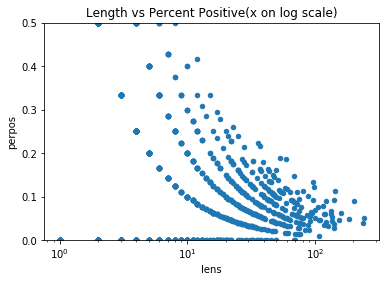

In [12]:
data.plot.scatter(x='lens',y='perpos',ylim=(0,0.5),title='Length vs Percent Positive(x on log scale)')
plt.xscale('log')


The plot is much cleaner.

In [13]:
#logfit the data
A,B = np.polyfit(np.log(data.lens), data.perpos ,1)
print('A=',A)
print('B=',B)

A= -0.0989554843401059
B= 0.40725359104413805


The following values plug into a predictive equation:
Percent Positive = A*log(length) + B

In [14]:
pred = []
for i in data.lens:
    pred.append((A*np.log(i)) + B)    

In [15]:
err = 0
for i in range(0,len(pred)):
    err = err + abs(data.perpos[i]-pred[i])
err = err / len(pred)
print('Accuracy of Model:', 100-err*100)

Accuracy of Model: 85.08520856586644


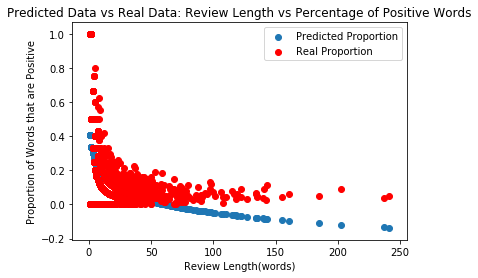

In [16]:
plt.scatter(data.lens,pred,label="Predicted Proportion")
plt.scatter(data.lens,data.perpos, label="Real Proportion",color='red')
plt.legend()
plt.title('Predicted Data vs Real Data: Review Length vs Percentage of Positive Words');
plt.xlabel('Review Length(words)');
plt.ylabel('Proportion of Words that are Positive');

88% is a reasonable predictive accuracy, but I believe it can be better with a cleaned sample of data. In the previous plot, there is a line of outlier data that is the data points with a  percent positive value of 0. The new data will remove these, and perhaps a more accurate model can be built.

In [17]:
adj_data = data[data.perpos>0]
adj_data.index = range(0,len(adj_data))
#adj_data = adj_data.reindex(range(0,len(adj_data)),axis='index')
adj_data.head()

,Product Name,Rating,Date,Author,Body,Link,bag,lens,numpos,numneg,perpos,perneg,numposneg,perposneg
0,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"September 11, 2019",XtinaG,There is great stretch and comfort to these sh...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[there, is, great, stretch, and, comfort, to, ...",25,3,0,0.120000,0.000000,3,0.120000
1,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"August 4, 2019",XtinaG,This was my first pair of rugby shorts. I tend...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[this, was, my, first, pair, of, rugby, shorts...",41,5,1,0.121951,0.024390,6,0.146341
2,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"April 14, 2019",Amazon Customer,I did not want shorts that are tight on the wa...,https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[i, did, not, want, shorts, that, are, tight, ...",50,2,0,0.040000,0.000000,2,0.040000
3,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"March 13, 2019",Garrett,"Well made, heavy fabric. The flexible materia...",https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[well, made, heavy, fabric, the, flexible, mat...",52,6,1,0.115385,0.019231,7,0.134615
4,RHINO RUGBY Fitted Stretch Performance Game Da...,5.0,"July 26, 2019",Chuck Davidson,"They are a really good fit, other rugby shorts...",https://amazon.com/RHINO-RUGBY-Fitted-Stretch-...,"[they, are, a, really, good, fit, other, rugby...",18,5,0,0.277778,0.000000,5,0.277778


The new dataframe has data where there is at least 1 positive word. The same steps as before will now be applied to do new analysis.

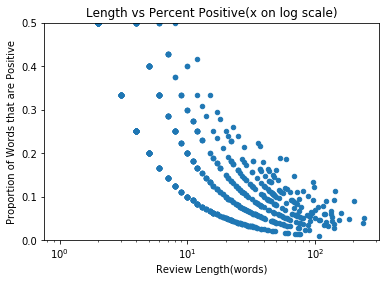

In [18]:
adj_data.plot.scatter(x='lens',y='perpos',ylim=(0,0.5),
                      title='Length vs Percent Positive(x on log scale)')
plt.xlabel('Review Length(words)');
plt.ylabel('Proportion of Words that are Positive');
plt.xscale('log')

In [19]:
#logfit the data
AA,BB = np.polyfit(np.log(adj_data.lens), adj_data.perpos ,1)
print('A=',AA)
print('B=',BB)

A= -0.16673824612706709
B= 0.6634653466467709


In [20]:
adj_pred = []
for i in adj_data.lens:
    adj_pred.append((AA*np.log(i)) + BB)    

In [21]:
adj_err = 0
for i in range(0,len(adj_pred)):
    adj_err = adj_err + abs(adj_data.perpos[i]-adj_pred[i])
adj_err = adj_err / len(adj_pred)
print('Accuracy of Model:', 100-adj_err*100)

Accuracy of Model: 88.63391728493401


The accuracy has actually gone down, contrary to my initial thought improvements would be seen. Why is this? I will plot both the real and predictive data points to investigate.

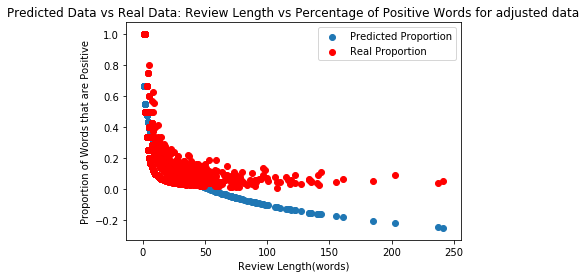

In [22]:
plt.scatter(adj_data.lens,adj_pred,label="Predicted Proportion")
plt.scatter(adj_data.lens,adj_data.perpos, label="Real Proportion",color='red')
plt.legend();
plt.title(
    'Predicted Data vs Real Data: Review Length vs Percentage of Positive Words for adjusted data');
plt.xlabel('Review Length(words)');
plt.ylabel('Proportion of Words that are Positive');

The model accounts for values beneath 0.0, but still for a large amount of the data is fairly accurate. 

# Conclusion
## Final Analysis
The final analysis for comparing review length to positivity revealed that there is correlation between the 2, and that it can even be modeled using a log fit with decent accuracy.

## Explanation
Amazon can make great use of these findings. They can use this to find a key review length where the percentage of the vocabulary that is positive words is high, but the review length is not extremley long. This is because the findings show that the longer reviews tend to wean off and not be as positive. If Amazon wants to put reviews to highlight the product, they can maximize praise for a product in this highlighted review by finding these medium length reviews, that are positive. This is compared to short reviews that don't give product details, or long reviews that will not highlight as many positive aspects of the product.

As a final conclusion for all analysis, the ratings fundamentally do a good job of representing the sentiment of the review by the rating. Also, the positivity of a review can be predicted to a fairly accurate degree by the length of that review.

## Why cleaning my sample produced worse predictive results
Looking at the pre-adjusted and adjusted data for the analysis, adjusting my data resulted in a worse predictive accuracy because the predictions lead into negative percentage territory. For this application (percentage of positive reviews for a product) the response variable being negative is non-existent in the real setting. When removing the 0% values from the dataframe, this meant that predictive values that were in the negative percentage category were didn't have the 0 percent data points to adjust the predictive fit. In reality, the inital predictive accuracy was innacurate, and the adjusted one better represents the reality of the data.